# For each of the following steps click on the cell you want to process, then click 'Run' to see the output
# Reading and Exploring Data Set

In [16]:
import nltk
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from collections import Counter

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
pd.set_option('display.max_colwidth', 50)

data = pd.read_csv("survey.csv", sep=',')
data.drop('Timestamp', axis=1, inplace=True)

# first 5 rows of the data set
data.head()


,LEVEL,ROLE,STAGE,ENHANCE,EASE,ATTITUDE,CHARACTERISTICS,SUPPORT,EXTERNAL,SIZE,EXPERTISE,ADVANTAGES,COMPATIBLE,ADDITIONAL
0,Federal,Management / Jr Officer,Some initial discussion has occurred around th...,Cloud computing would not enhance my job.,Cloud infrastructure would not enhance my job.,"Leadership like to talk about change, but any ...",Anti innovation and lost in the 1980s.,no support,no influence,Unknown,Unknown,Not sure we use SharePoint and have remote acc...,As mention above our work does not require acc...,NaN
1,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,Using any device log into a center service pro...,Not needing to transport personal and work equ...,The leadership likes adopting better solutions...,"Supportive, but other factors inside and outsi...",The main obstacle of a fully cloud infrastruct...,"Little, but if solutions are found in the priv...",The number of personnel required to maintain I...,We have a limited number if cloud technologist...,Reduced resource burden,"Low, due the lack of control of the infrastruc...",NaN
2,Federal,Executive / Snr Officer,No discussion has occurred,don't know enough about it,don't know,good,good,don't know,don't know,big,don't know,don't know enough about is,don't know,NaN
3,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,I'm not sure.,"Once it was implemented, it probably would. My...","Leadership likes change, policy makers do not.","Leadership likes innovation, policy makers do ...",There is a group at ADM(IM) who is looking at ...,"I'm not sure it does, unless you count the Tre...",All of my organization is allocated to the IT ...,Not high unless someone has done some studying...,I'm not sure what advantages there would be.,I'm not sure.,NaN
4,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,It has the potential to significantly enhance ...,It has the potential to significantly enhance ...,Very supportive with the caveat that it be ine...,Very supportive with the caveat that it be ine...,The concept is nascent at this time.,"In general, I do not believe it influences the...",I am not significantly aware to describe the s...,I think that our IT department would require a...,It could bring major advantages in terms of ag...,It could be very compatible but again would re...,NaN


#### Responses per level

In [17]:
data['LEVEL'].value_counts()


Federal       9
Provincial    6
Municipal     6
Name: LEVEL, dtype: int64

#### Responses count

Text(0, 0.5, 'Count')

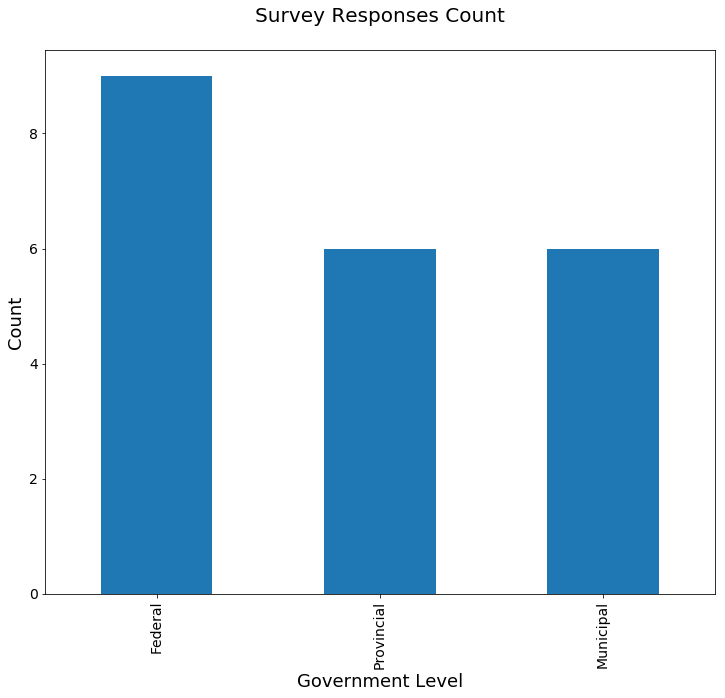

In [19]:
level = data['LEVEL'].value_counts().plot(kind='bar',fontsize=14,figsize=(12,10))
level.set_title('Survey Responses Count\n',fontsize=20)
level.set_xlabel('Government Level',fontsize=18)
level.set_ylabel('Count',fontsize=18)


#### Stage of adoption count

Text(0, 0.5, 'Count')

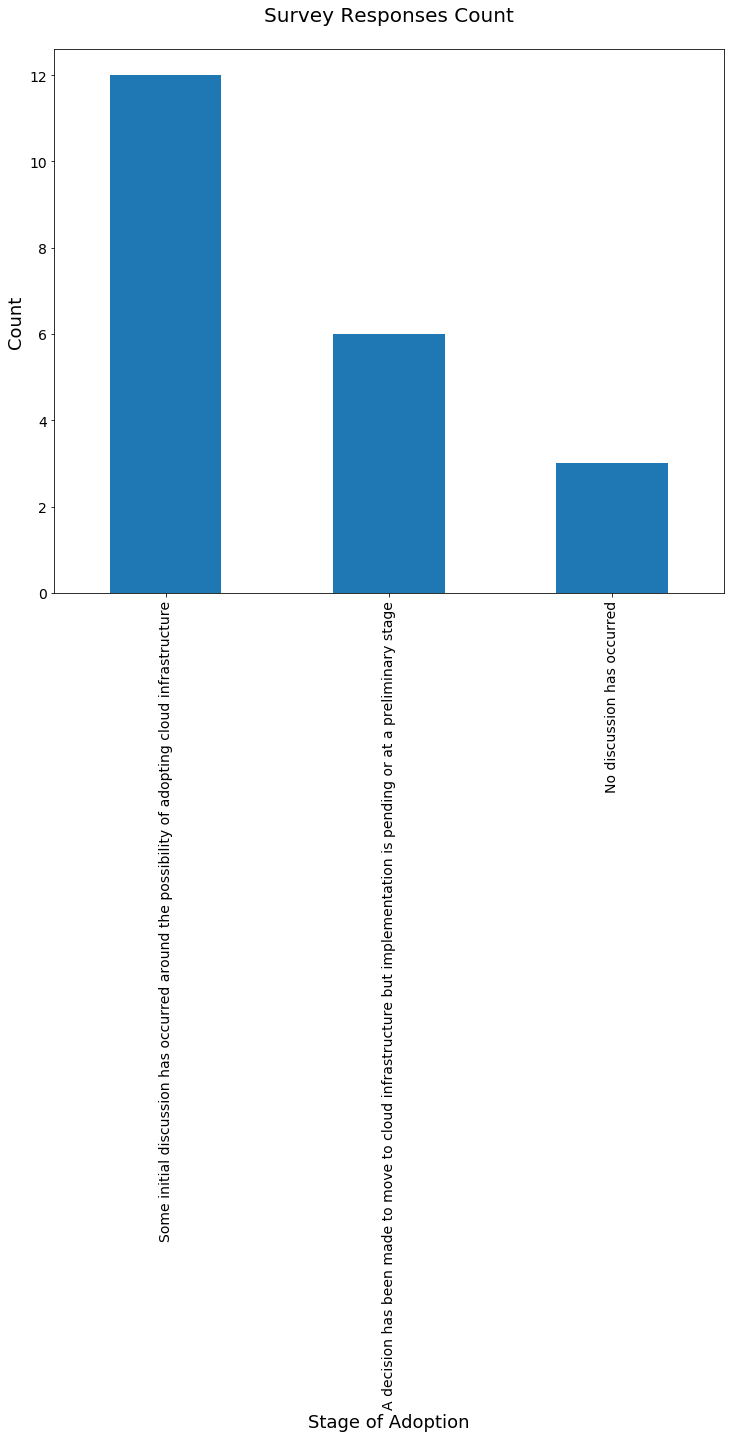

In [20]:
stage = data['STAGE'].value_counts().plot(kind='bar',fontsize=14,figsize=(12,10))
stage.set_title('Survey Responses Count\n',fontsize=20)
stage.set_xlabel('Stage of Adoption',fontsize=18)
stage.set_ylabel('Count',fontsize=18)


#### Who the participants were

Text(0, 0.5, 'Count')

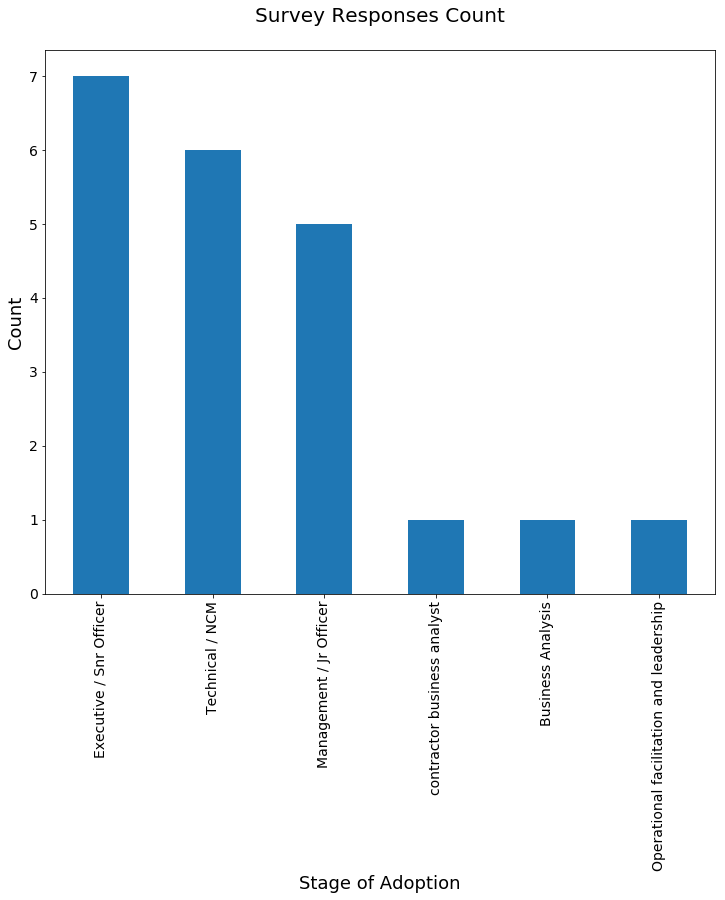

In [21]:
role = data['ROLE'].value_counts().plot(kind='bar',fontsize=14,figsize=(12,10))
role.set_title('Survey Responses Count\n',fontsize=20)
role.set_xlabel('Stage of Adoption',fontsize=18)
role.set_ylabel('Count',fontsize=18)


# POS (Parts of Speech) Extraction

In [22]:
cumulative_list = []
tagged = []
for label in data.keys():
    tokens = []
    
    for answers in data[label]:
        tokens = tokens + nltk.word_tokenize(str(answers))

    cumulative_list = cumulative_list + tokens   
    
    tagged = nltk.pos_tag(tokens)
    counts = Counter( tag for word,  tag in tagged)
    print(label,":",counts)

# WORK IN PROGRESS
    # grammar = "NP: {<DT>?<JJ>*<NN>}"
    # cp  =nltk.RegexpParser(grammar)
    # result = cp.parse(tagged)
    # result.draw()


LEVEL : Counter({'NNP': 21})
ROLE : Counter({'NNP': 69, 'NN': 5, 'CC': 1})
STAGE : Counter({'NN': 63, 'DT': 36, 'JJ': 30, 'IN': 30, 'VBZ': 27, 'VBN': 27, 'VBG': 18, 'TO': 12, 'VB': 12, 'CC': 12, 'NNP': 3})
ENHANCE : Counter({'NN': 63, 'IN': 27, 'VB': 26, 'JJ': 23, 'DT': 19, 'NNS': 18, 'MD': 14, 'RB': 12, 'PRP': 12, 'CC': 11, 'NNP': 10, '.': 10, 'TO': 10, 'VBG': 9, 'PRP$': 5, 'JJR': 5, 'VBZ': 4, ',': 4, 'VBN': 4, 'VBP': 3, ':': 2, 'WDT': 2, 'RBR': 2, 'WRB': 1, 'NNPS': 1, 'RP': 1, '(': 1, ')': 1})
EASE : Counter({'NN': 53, 'VB': 27, 'JJ': 26, 'IN': 25, 'NNS': 16, '.': 15, 'MD': 14, 'RB': 14, 'TO': 14, 'JJR': 14, 'CC': 10, ',': 10, 'NNP': 10, 'DT': 8, 'PRP': 7, 'VBG': 6, 'PRP$': 5, 'VBN': 4, 'VBP': 3, 'VBZ': 3, ':': 3, 'RBR': 3, '(': 2, ')': 2, 'RP': 2, 'VBD': 1})
ATTITUDE : Counter({'NN': 49, 'JJ': 29, 'IN': 23, 'DT': 23, 'RB': 18, 'VBZ': 17, 'CC': 14, '.': 14, 'VB': 13, 'NNS': 13, ',': 10, 'TO': 9, 'NNP': 7, 'PRP': 7, 'VBG': 4, 'VBP': 4, 'VBN': 3, ':': 2, 'RBR': 1, 'MD': 1, 'PRP$': 1, '

# Cleaning
### Removing punctuation,stopwords,stemming and tokenizing text

In [23]:
def clean_text(text):
    if type(text) is float:
        return ''
    else:
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        tokens = re.split('\W+', text)
        text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
        return text

# Run through each column, clean the data
for k in data:
    if k == 'LEVEL':
        continue
    data[k] = data[k].apply(lambda x: clean_text(x)) 

data.head(10)


,LEVEL,ROLE,STAGE,ENHANCE,EASE,ATTITUDE,CHARACTERISTICS,SUPPORT,EXTERNAL,SIZE,EXPERTISE,ADVANTAGES,COMPATIBLE,ADDITIONAL
0,Federal,"[management, jr, officer]","[initial, discussion, occurred, around, possib...","[cloud, computing, would, enhance, job]","[cloud, infrastructure, would, enhance, job]","[leadership, like, talk, change, real, change,...","[anti, innovation, lost, 1980s]",[support],[influence],[unknown],[unknown],"[sure, use, sharepoint, remote, access, requir...","[mention, work, require, access, time, device]",
1,Federal,"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[using, device, log, center, service, provider...","[needing, transport, personal, work, equipment...","[leadership, like, adopting, better, solution,...","[supportive, factor, inside, outside, organiza...","[main, obstacle, fully, cloud, infrastructure,...","[little, solution, found, private, sector, cou...","[number, personnel, required, maintain, organi...","[limited, number, cloud, technologist, priorit...","[reduced, resource, burden]","[low, due, lack, control, infrastructure, info...",
2,Federal,"[executive, snr, officer]","[discussion, occurred]","[dont, know, enough]","[dont, know]",[good],[good],"[dont, know]","[dont, know]",[big],"[dont, know]","[dont, know, enough]","[dont, know]",
3,Federal,"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[im, sure]","[implemented, probably, would, job, would, har...","[leadership, like, change, policy, maker]","[leadership, like, innovation, policy, maker]","[group, admim, looking, adopting, cloud, infra...","[im, sure, unless, count, treasury, board, pol...","[organization, allocated, department, department]","[high, unless, someone, done, studying, think,...","[im, sure, advantage, would]","[im, sure]",
4,Federal,"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[potential, significantly, enhance, job, cavea...","[potential, significantly, enhance, job, cavea...","[supportive, caveat, inexpensive, easily, impl...","[supportive, caveat, inexpensive, easily, impl...","[concept, nascent, time]","[general, believe, influence, organization]","[significantly, aware, describe, size, departm...","[think, department, would, require, massive, c...","[could, bring, major, advantage, term, agility...","[could, compatible, would, require, massive, c...",
5,Federal,"[executive, snr, officer]","[discussion, occurred]","[certain, would, enhance, job]","[access, information, reliable, source]","[somewhat, sceptical, change]","[leadership, organization, receptive, innovati...","[integrated, technology, shared, service, cana...",[],"[2, person, team, organization]","[qualified, support, cloud, technology]","[cloud, technology, proven, technology, would,...","[cloud, technology, would, properly, integrate...","[would, think, organization, department, natio..."
6,Federal,"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[improved, reliability, improved, service, imp...","[would, likely, save, time, using, better, too...","[positive, accepting, constant, change, change...","[embracing, innovation, word, practice, fall, ...","[shared, service, canada, lead, providing, clo...","[federal, government, canada, expected, keep, ...","[barely, adequate, seemingly, far, behind, wor...","[strong, fully, adopted, yet, nascent]","[reliable, redundant, service, faster, hopeful...","[daytoday, office, work, could, greatly, enhan...","[related, cloud, computing, thin, client, virt..."
7,Municipal,"[technical, ncm]","[initial, discussion, occurred, around, possib...","[would, allow, focus, development, le, support...","[easier, deploy, code, access, anywhere]","[resistant, change, lot, fear, tied, decision,...","[poor, tendency, shy, away, thing, dont, under...","[minimal, afraid, infrastructure, data, premise]",[unknown],[1520],"[exploratory, moment]","[would, control, code, deployment]","[could, seamless, server

#### Create a new column, Number of words per survey response

In [24]:
num_wds = []
for row in data.itertuples():
    num_wds.append(len(row.ENHANCE)+len(row.EASE)+len(row.ATTITUDE)+len(row.CHARACTERISTICS)+len(row.SUPPORT)+len(row.EXTERNAL)+len(row.SIZE)+len(row.EXPERTISE)+len(row.ADVANTAGES)+len(row.COMPATIBLE)+len(row.ADDITIONAL))

# populate a new column with the calculated values
data['num_wds'] = num_wds
print("Congratulations, New Column Created!")

Congratulations, New Column Created!


#### Plot number of words per group in survey responses

Federal 781
Municipal 580
Provincial 371


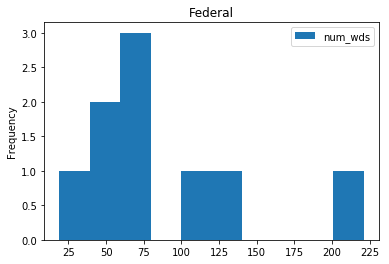

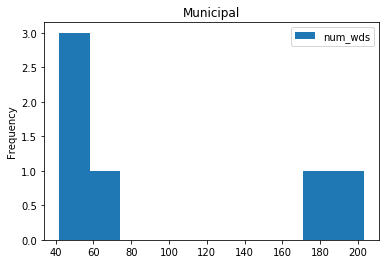

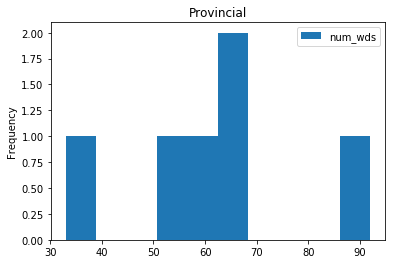

In [25]:
for title, group in data.groupby('LEVEL'):
    print(title, sum(group['num_wds']))
    group.plot(kind='hist',x='LEVEL',y='num_wds',title=title)


# Frequency Distribution
### A graph is created for each of the survey questions       

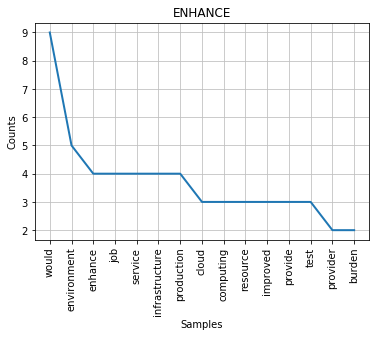

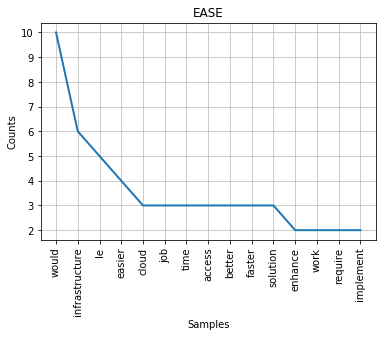

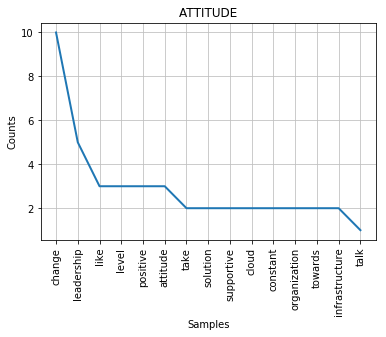

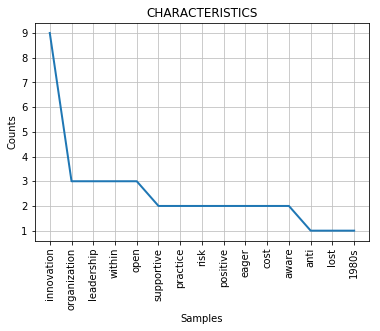

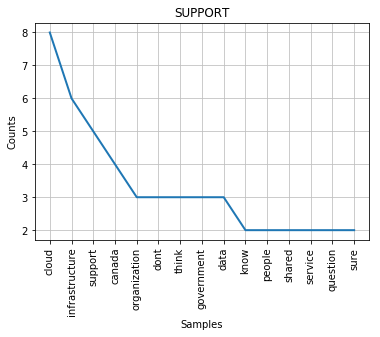

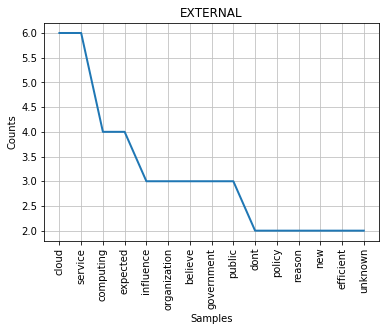

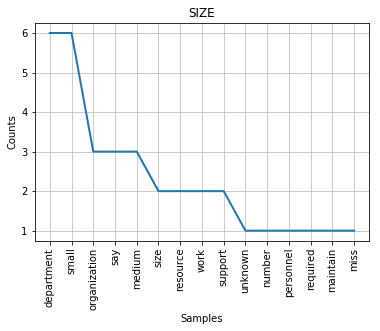

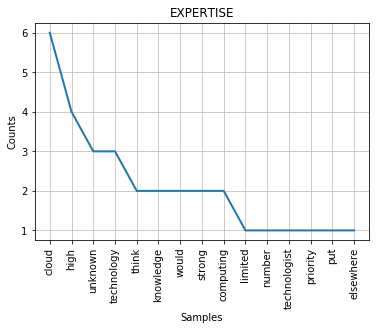

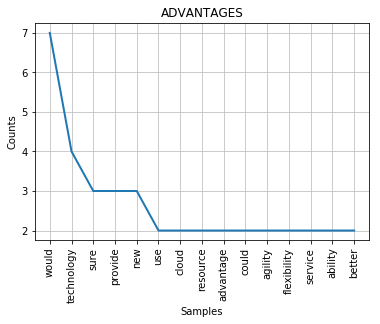

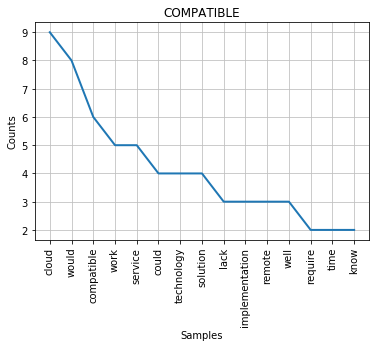

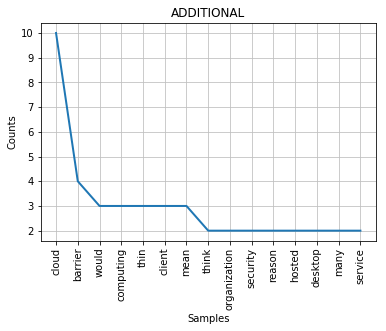

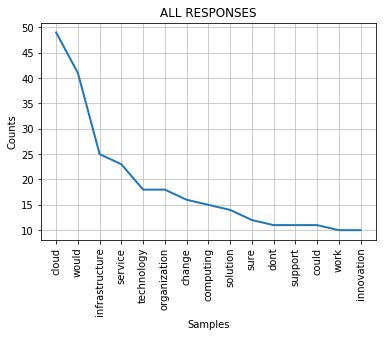

In [26]:
cumulative_list = []
for label in data.keys():
    new_list = []
    exclude = ['LEVEL','ROLE','STAGE']
    for answers in data[label]:
        if label in exclude:
            continue
        if isinstance(answers,list):
            new_list = new_list + answers 
    
    # collect all answers
    cumulative_list = cumulative_list + new_list  
    
    # start making graph
        # only produce a graph if not empty
    if not new_list:
        continue
    fd = nltk.FreqDist(filter(None,new_list))
    fd.plot(15,cumulative=False,title=label)
    plt.show()

fd_all = nltk.FreqDist(filter(None,cumulative_list))
fd_all.plot(15,cumulative=False,title='ALL RESPONSES')
plt.show()


## Frequency Distribution of Bigrams 

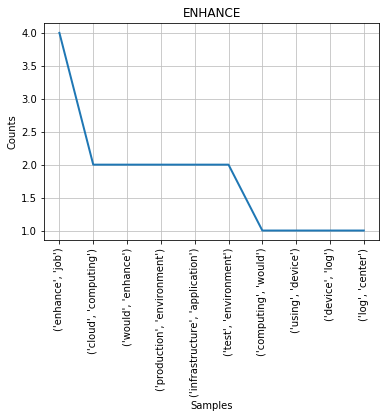

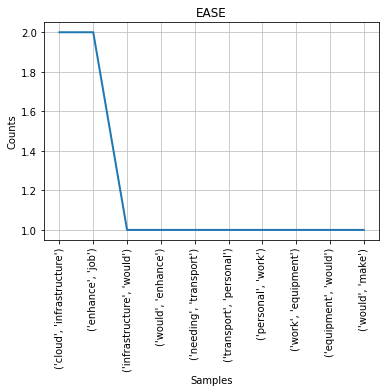

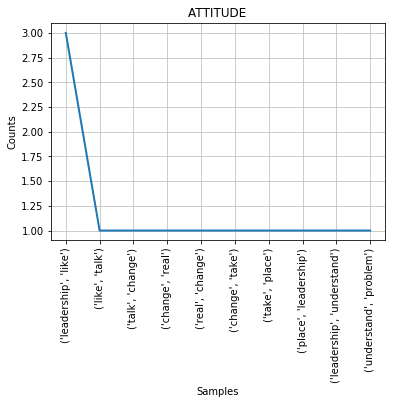

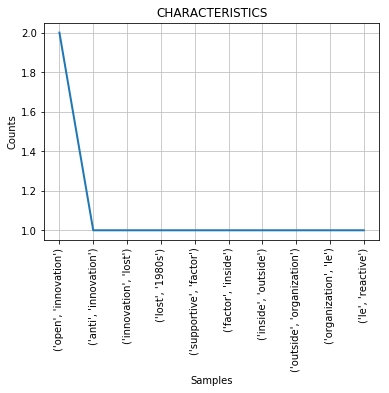

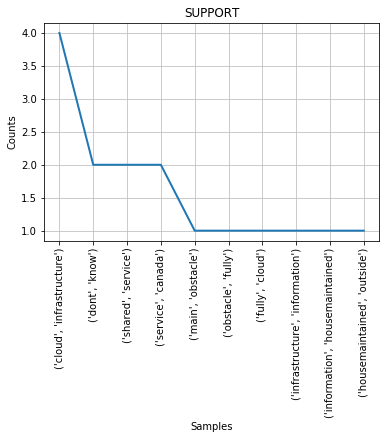

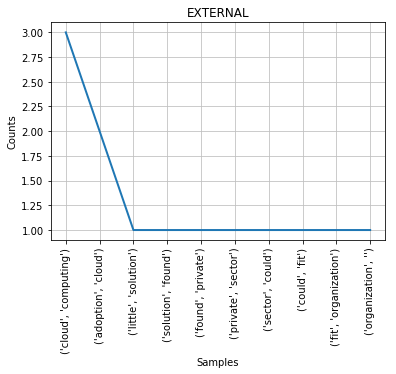

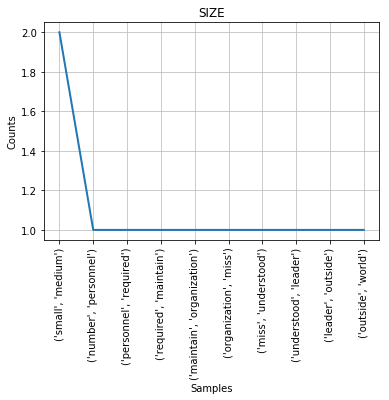

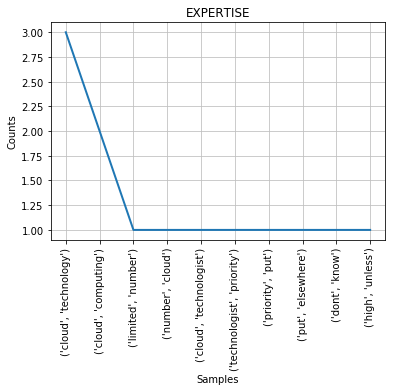

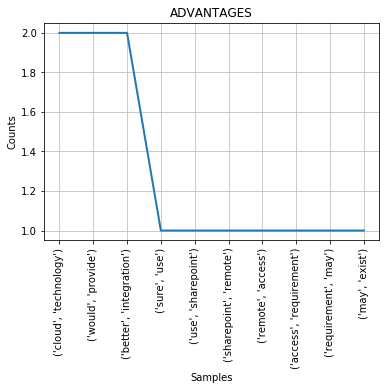

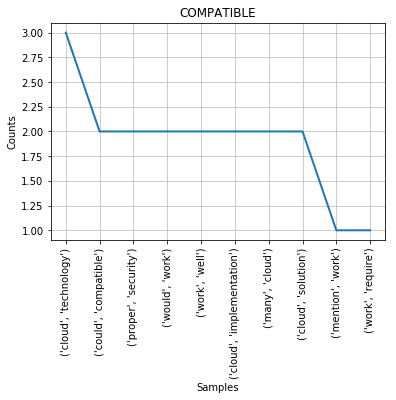

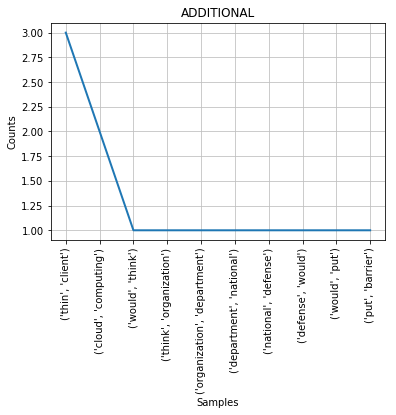

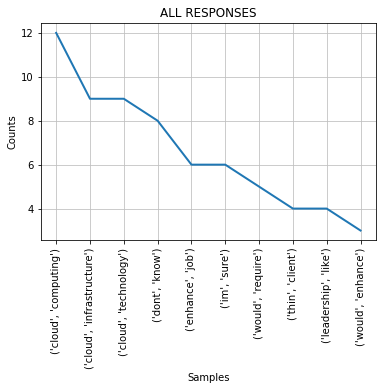

In [27]:
cumulative_list = []
for label in data.keys():
    output = []
    exclude = ['LEVEL','ROLE','STAGE']
    
    # run through each column of survey responses
    for answers in data[label]:
        if label in exclude:
            continue
        if isinstance(answers,list):
            output = output + list(nltk.bigrams(answers))
    
    # collect all bigrams
    cumulative_list = cumulative_list + output
    
    # only produce a graph if not empty
    if not output:
        continue
    fd = nltk.FreqDist(filter(None,output))
    fd.plot(10,cumulative=False,title=label)
    plt.show()

fd = nltk.FreqDist(filter(None,cumulative_list))
fd.plot(10,cumulative=False,title='ALL RESPONSES')
plt.show()


## Frequency Distribution of Trigrams 


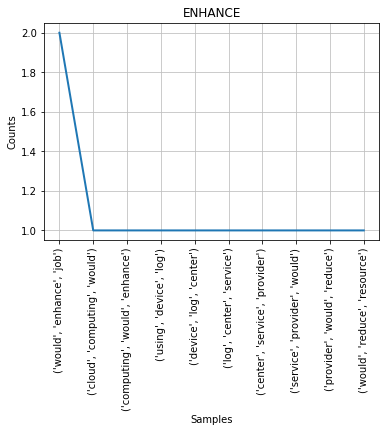

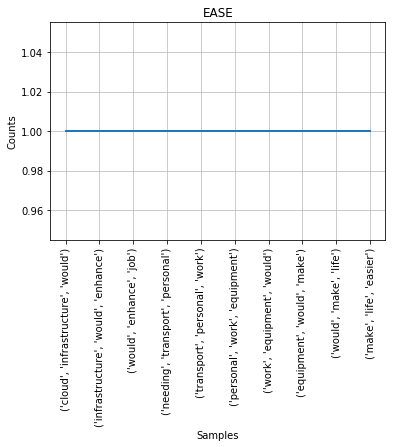

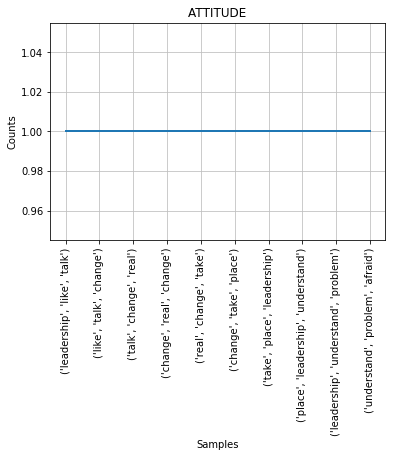

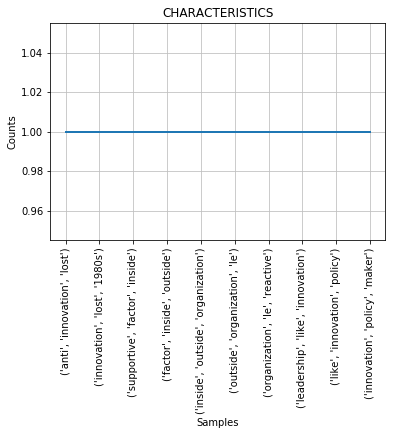

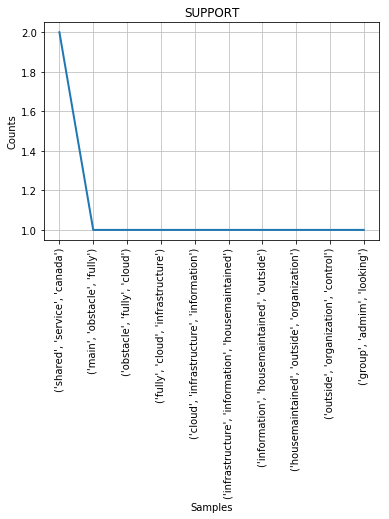

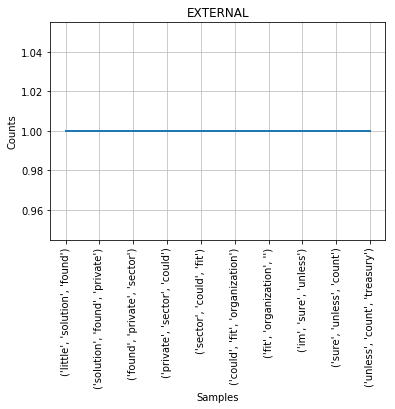

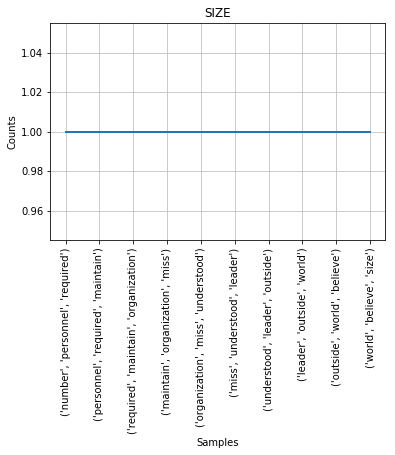

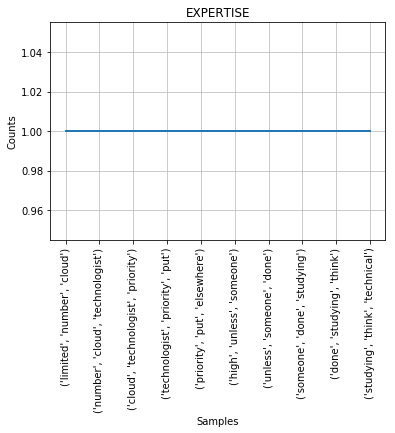

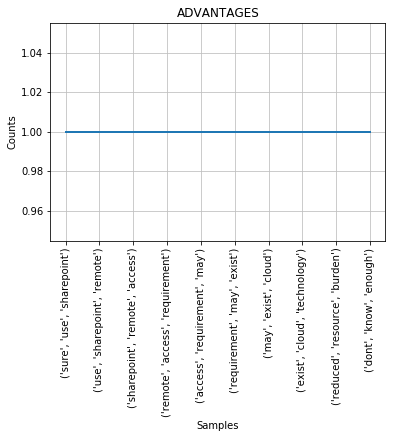

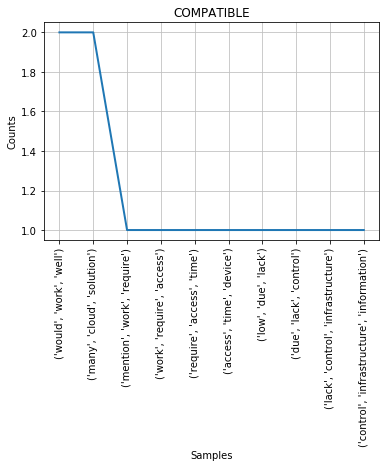

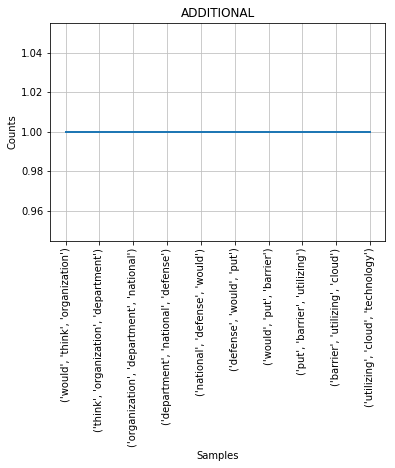

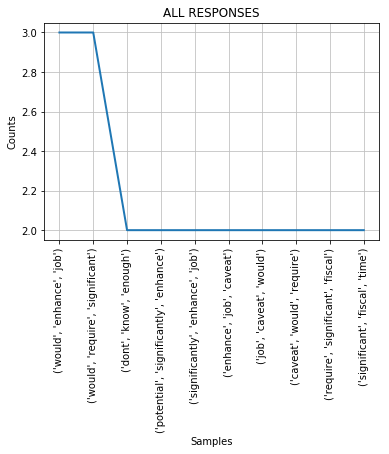

In [28]:
cumulative_list = []
for label in data.keys():
    output = []
    exclude = ['LEVEL','ROLE','STAGE']
    
    # run through each column of survey responses
    for answers in data[label]:
        if label in exclude:
            continue
        if isinstance(answers,list):
            output = output + list(nltk.trigrams(answers))
    
    # collect all bigrams
    cumulative_list = cumulative_list + output
    
    # only produce a graph if not empty
    if not output:
        continue
    fd = nltk.FreqDist(filter(None,output))
    fd.plot(10,cumulative=False,title=label)
    plt.show()

fd = nltk.FreqDist(filter(None,cumulative_list))
fd.plot(10,cumulative=False,title='ALL RESPONSES')
plt.show()

